## 2024 Week 6 - Staff Income Tax

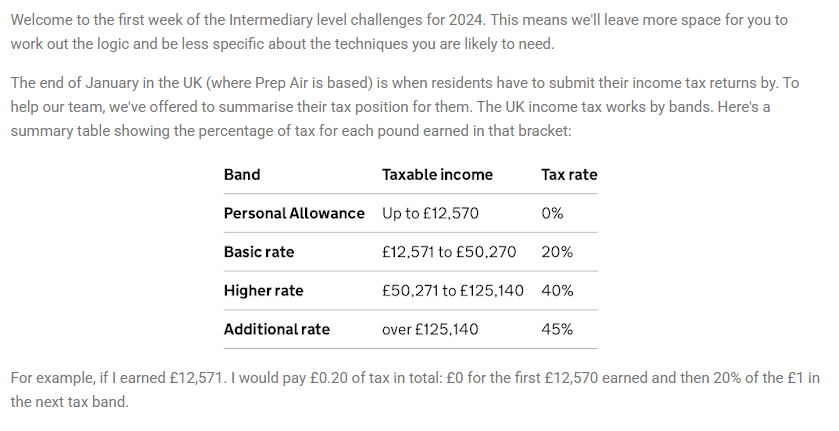
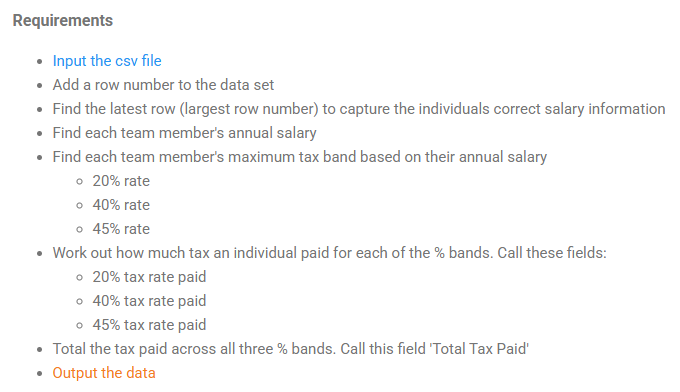

In [71]:
import pandas as pd
import numpy as np

In [72]:
df = pd.read_csv('PD 2024 Wk 6 Input.csv')
df.head()

,StaffID,1,2,3,4,5,6,7,8,9,10,11,12
0,1533,2398.0,2421.98,2446.20,2446.20,2495.12,2495.12,2495.12,2495.12,2545.03,2621.38,2621.38,2621.38
1,1339,7304.0,7523.12,7673.58,7673.58,7750.32,7827.82,8062.66,8304.54,8470.63,8555.33,8555.33,8726.44
2,2291,8240.0,8404.80,8572.90,8744.35,8831.80,9096.75,9278.69,9464.26,9464.26,9464.26,9558.90,9558.90
3,2038,3908.0,3986.16,3986.16,4026.02,4066.28,4188.27,4313.92,4443.34,4487.77,4622.40,4668.63,4715.31
4,2810,3988.0,4107.64,4148.72,4190.20,4274.01,4316.75,4316.75,4359.92,4490.71,4535.62,4671.69,4718.41


In [73]:
df.duplicated(subset=['StaffID']).sum()
# That's way we are going to capture the individuals' latest row to get the correct salary information.
# salaries of the last 12 month

196

#### Add a row number to the data set
#### Find the latest row (largest row number) to capture the individuals correct salary information

In [75]:
df['RowNumber'] = range(df.shape[0])

In [76]:
latest_salaries =  df.loc[df.groupby('StaffID')['RowNumber'].idxmax()]

#### Find each team member's annual salary


In [78]:
latest_salaries['Salary'] = latest_salaries.iloc[:, 1:-1].sum(axis=1)

In [79]:
latest_salaries[latest_salaries['StaffID']==1052]
df = latest_salaries[['StaffID', 'Salary']]

In [80]:
bins = [0, 12570, 50270, 125140, float('inf')]
labels = ['0% rate', '20% rate', '40% rate', '45% rate']

In [81]:
df.loc[:, ['Max Tax Rate']] = pd.cut(df.Salary, bins, labels=labels, right=True)
df

,StaffID,Salary,Max Tax Rate
386,1000,173197.95,45% rate
5,1001,166864.48,45% rate
877,1007,27969.52,20% rate
262,1010,111033.29,40% rate
96,1012,115739.53,40% rate
...,...,...,...
515,2994,111712.65,40% rate
322,2995,134668.02,45% rate
842,2997,32379.93,20% rate
565,2998,24647.13,20% rate


In [103]:
# Define tax band limits and personal allowance (2023/2024 UK tax rates)
personal_allowance = 12570  # Income up to £12,570 is tax-free
basic_rate_limit = 50270    # Basic rate applies to income between £12,571 and £50,270
higher_rate_limit = 125140  # Higher rate applies to income between £50,271 and £125,140

# Function to calculate tax paid at the 20% rate
def cal_rate_20_tax(salary):
    """
    Calculate the tax paid at the 20% rate (basic rate).
    Args:
        salary (float): The individual's annual income.
    Returns:
        float: The tax paid at the 20% rate, or NaN if the income is not taxable.
    """
    # Calculate taxable income by subtracting the personal allowance
    taxable_income = max(salary - personal_allowance, 0)
    
    # Calculate income in the basic rate band
    # The basic rate applies to income between £12,571 and £50,270
    basic_rate_income = min(taxable_income, basic_rate_limit - personal_allowance)
    
    # Calculate tax at the 20% rate
    return basic_rate_income * 0.2

# Function to calculate tax paid at the 40% rate
def cal_rate_40_tax(salary):
    """
    Calculate the tax paid at the 40% rate (higher rate).
    Args:
        salary (float): The individual's annual income.
    Returns:
        float: The tax paid at the 40% rate, or NaN if the income is not taxable.
    """
    # Calculate taxable income by subtracting the personal allowance
    taxable_income = max(salary - personal_allowance, 0)
    
    # Calculate income in the higher rate band
    # The higher rate applies to income between £50,271 and £125,140
    higher_rate_income = min(
        max(taxable_income - (basic_rate_limit - personal_allowance), 0),
        higher_rate_limit - basic_rate_limit
    )
    
    # Calculate tax at the 40% rate
    return higher_rate_income * 0.4

# Function to calculate tax paid at the 45% rate
def cal_rate_45_tax(salary):
    """
    Calculate the tax paid at the 45% rate (additional rate).
    Args:
        salary (float): The individual's annual income.
    Returns:
        float: The tax paid at the 45% rate, or NaN if the income is not taxable.
    """

    # Calculate taxable income by subtracting the personal allowance
    taxable_income = max(salary - personal_allowance, 0)
    
    # Calculate income in the additional rate band
    # The additional rate applies to income above £125,140
    additional_rate_income = max(taxable_income - (higher_rate_limit - personal_allowance), 0)
    
    # Calculate tax at the 45% rate
    return additional_rate_income * 0.45


In [105]:
df.loc[:, ['20% rate tax paid']] = df.Salary.apply(cal_rate_20_tax)
df.loc[:, ['40% rate tax paid']] = df.Salary.apply(cal_rate_40_tax)
df.loc[:, ['45% rate tax paid']] = df.Salary.apply(cal_rate_45_tax)

In [113]:
df.loc[:, ['Total Tax Paid']] = df['20% rate tax paid'] + df['40% rate tax paid'] + df['45% rate tax paid']

In [133]:
df.head()

,Salary,Max Tax Rate,20% rate tax paid,40% rate tax paid,45% rate tax paid,Total Tax Paid
StaffID,,,,,,
1000,173197.95,45% rate,7540.000,29948.000,21626.0775,59114.0775
1001,166864.48,45% rate,7540.000,29948.000,18776.0160,56264.0160
1007,27969.52,20% rate,3079.904,0.000,0.0000,3079.9040
1010,111033.29,40% rate,7540.000,24305.316,0.0000,31845.3160
1012,115739.53,40% rate,7540.000,26187.812,0.0000,33727.8120
